What is a Hyperplane?

In [2]:
# In a p-dimensional space, a hyperplane is a flat affine subspace of dimension p-1, For instance, in two dimesions, a flat one dimensional subspace in other words, a line. In three dimensions, a hyperplane is a flat two dimensional subsapce that is a plane. In p>3 dimensions, The hyperplane will be of two dimensions and so on.




# affine means it does not necessarily needs to pass through origin

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from ISLP.svm import plot as plot_svm

roc_curve = RocCurveDisplay.from_estimator

## Support Vector Classifier

In [3]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x7F2572011700

In [7]:
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)

In [9]:
X[y==1] += 1

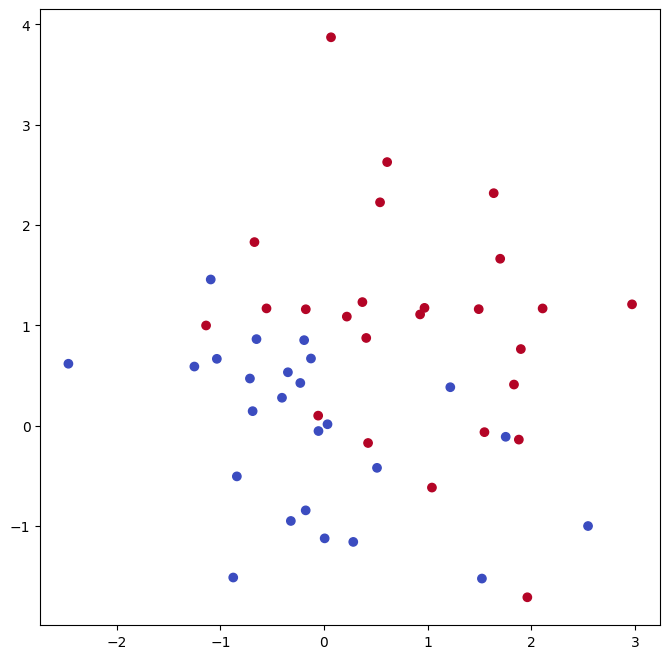

In [12]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=plt.cm.coolwarm)

In [13]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

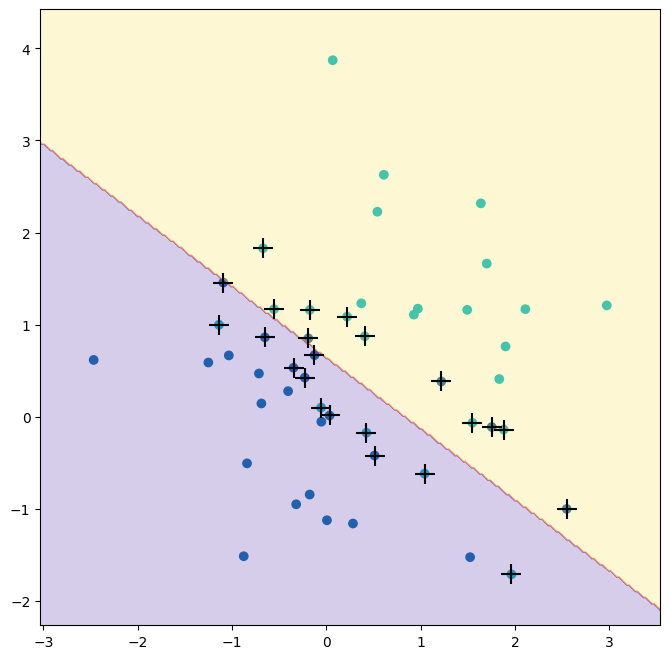

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,y,svm_linear,ax=ax)

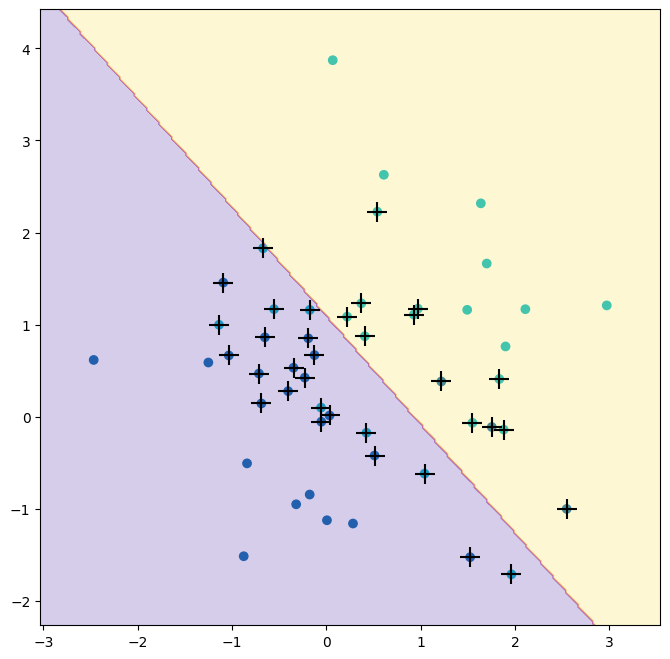

In [18]:
#Using a smaller value of cost parameter or c

svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X,y)
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,y, svm_linear_small, ax=ax)

In [20]:
svm_linear_small.coef_,svm_linear.coef_

(array([[0.66757385, 0.56638558]]), array([[1.15342812, 1.49469853]]))

In [23]:
#using kfold and checking
from sklearn.model_selection import KFold, GridSearchCV

kfold = KFold(5,
            random_state=11,
            shuffle=True)

grid = GridSearchCV(svm_linear,
                    {'C':[0.001 ,0.01 ,0.1 ,1 ,5 ,10 ,100]},
                    refit=True,
                    cv=kfold,
                    scoring='accuracy'
)

grid.fit(X,y)
grid.best_params_

{'C': 5}

In [26]:
# We can easily access the cross-validation errors for each of these models in grid.cv_results_
# This prints out a lot of detail, so we extract the accuracy results only


grid.cv_results_[('mean_test_score')]

array([0.38, 0.42, 0.76, 0.8 , 0.82, 0.82, 0.8 ])

In [27]:
# we can see that c=5 yields the highest cros-validation accuracy of 0.82,
# though the accuracy is the same for several values of C. The classifier grid.best_estimator_ can be used
# predict the class label on a set of test observations. Lets generate a test data set.

In [29]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

In [30]:
# Now we predict the class labels of these test observations. Here we use the best model selected
# by cross-validation in order to make the predictions.

best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,9,3
1,1,7


In [33]:
# Thus with this value of c, 80% of the test observations are correctly classified. What
# if we had instead used c=0.001

svm_ = SVC(C=0.001,
           kernel='linear').fit(X, y)

y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,9,4
1,1,6


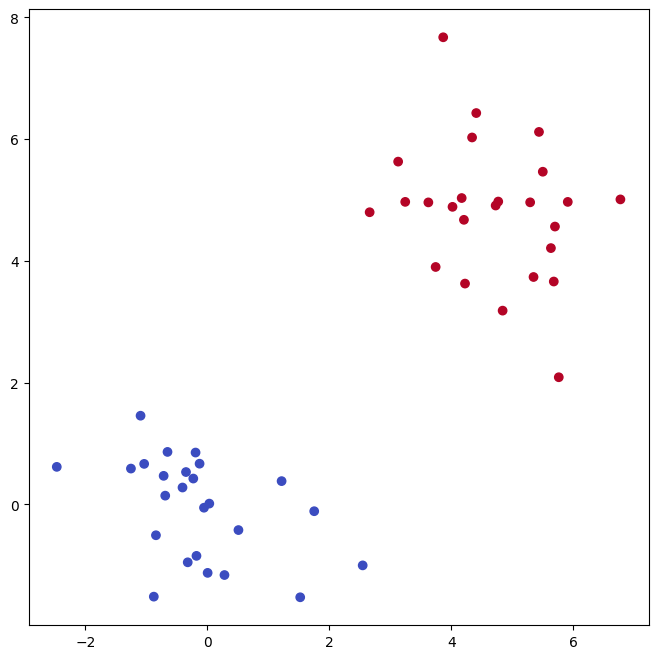

In [35]:
# We now consider a situation in which the two classes are linearly separable. Then we can
# find an optimal separating hyperplane using the SVC(0 estimator. We first further separate 
# the two classes in our simulated data so that they are linearly separable

X[y==1] += 1.9
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)

In [36]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


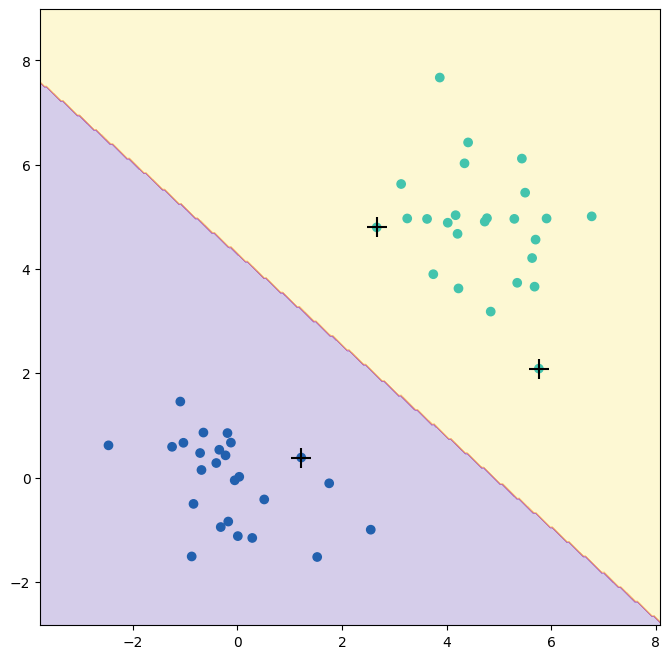

In [37]:
fig, ax=  plt.subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [38]:
# Indeed no training errors were made and only three support vectors were used. In fact,
# the large value of C also means that these three support points are on the margin and define it
# One may wonder how good the classifier could be on test data that depends on only three data points
# We now try a smaller value of C

svm_ = SVC(C=0.1, kernel='linear').fit(X,y)
y_hat=  svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


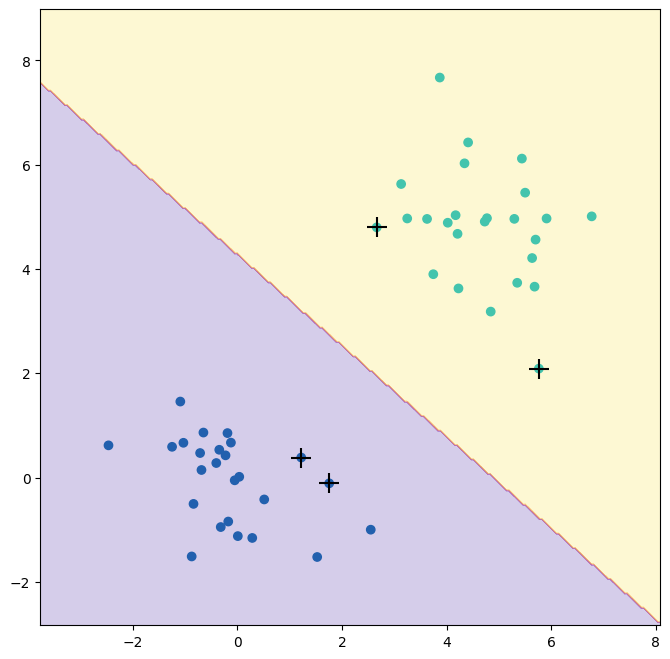

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

## Support Vector Machine

In [44]:
# To fit an svm with a polynomial kernel we use kernel='poly'
# And to fit an SVM with a radial kernel we use kernel='rbf'. In the former case we also use the 
# degree argument to specify a degree for the polynomial kernel 
# and in the latter case we use gamma to specify a value of gamma for the radial basis kernel

X = rng.standard_normal((200,2))
X[:100] += 2
X[100:150] -= 2

In [45]:
X

array([[ 1.71140635,  0.86301721],
       [ 1.38042097,  1.75000375],
       [ 3.36912785,  1.3895053 ],
       [ 3.79433577,  1.07131218],
       [ 1.6424132 ,  2.84354365],
       [ 1.75980507,  1.16973796],
       [ 1.86815659,  2.44871249],
       [ 0.28426579,  1.75146365],
       [ 1.89066338,  1.59625224],
       [ 2.73535607,  1.43144783],
       [ 1.63548515,  2.03764259],
       [ 2.72884909,  1.77883738],
       [ 3.51659727,  1.0922817 ],
       [ 3.28651435,  1.14217845],
       [ 1.83693352,  2.36404619],
       [ 4.05483986,  2.89582615],
       [ 1.59413715,  3.29911912],
       [ 1.7862951 ,  1.20855414],
       [ 2.44868469,  2.09447085],
       [ 2.95366637,  1.45026164],
       [ 2.3815035 ,  2.63454933],
       [ 2.27804556,  1.97101647],
       [ 1.30238163,  2.90375179],
       [ 2.1372245 ,  2.49630397],
       [ 1.64922176,  2.01301169],
       [ 0.96277201,  2.0855253 ],
       [ 2.76521032,  2.09299329],
       [ 2.85939281,  2.31291048],
       [ 3.36385663,

In [47]:
y = np.array([1]*150+[2]*50)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

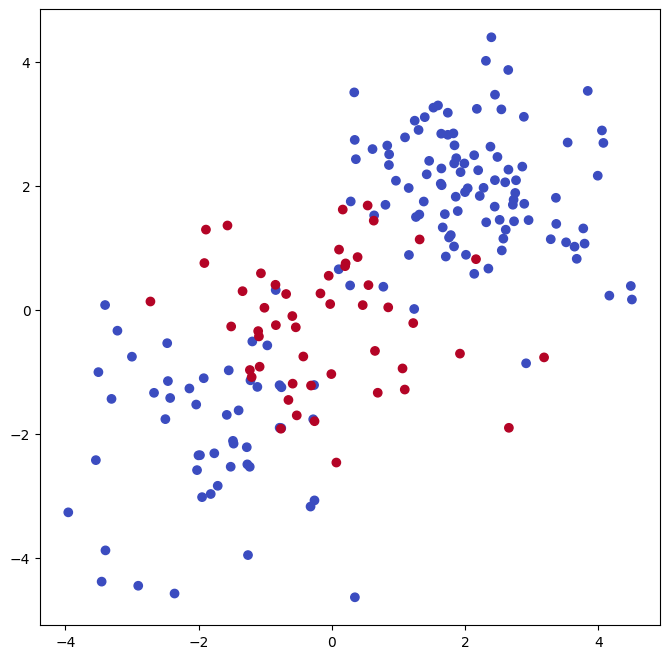

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=plt.cm.coolwarm)

### The data is randomly split into training and testing groups.We then fit the training data using the SVC() estimator with a radial kernel and a gamma = 1:

In [49]:
from sklearn.model_selection import train_test_split


(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.5, random_state=22)


svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

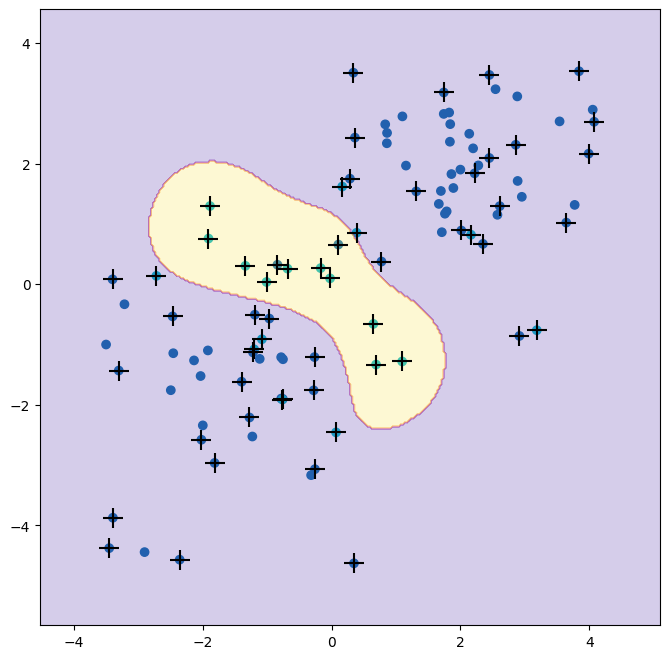

In [50]:
# The plot shows that the resulting SVM has a decidedly non-linear boundary

fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [ ]:
plot_svm?

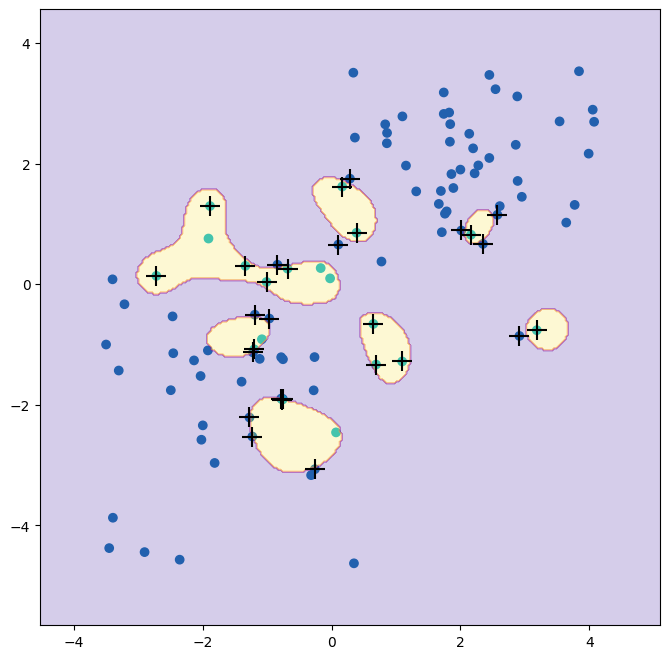

In [58]:
svm_rbf = SVC(kernel='rbf', C=1e5, gamma=2)
svm_rbf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [62]:
kfold = KFold(n_splits=5,shuffle=True,random_state=22)

grid = GridSearchCV(svm_rbf,
                    {'C':[0.1 ,1 ,10 ,100 ,1000],
                     'gamma':[0.5,1,2,3,4,5]},
                     refit=True,
                     cv=kfold,
                     scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_


{'C': 1, 'gamma': 1}

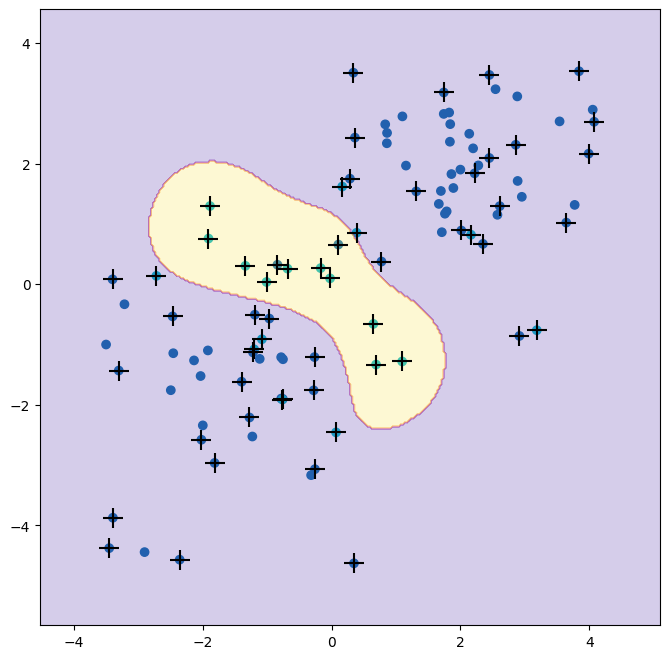

In [64]:
# The best choice for estimators emerge as C=1, gamma=1

best_svm = grid.best_estimator_
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X_train, y_train, best_svm, ax=ax)

## ROC Curves

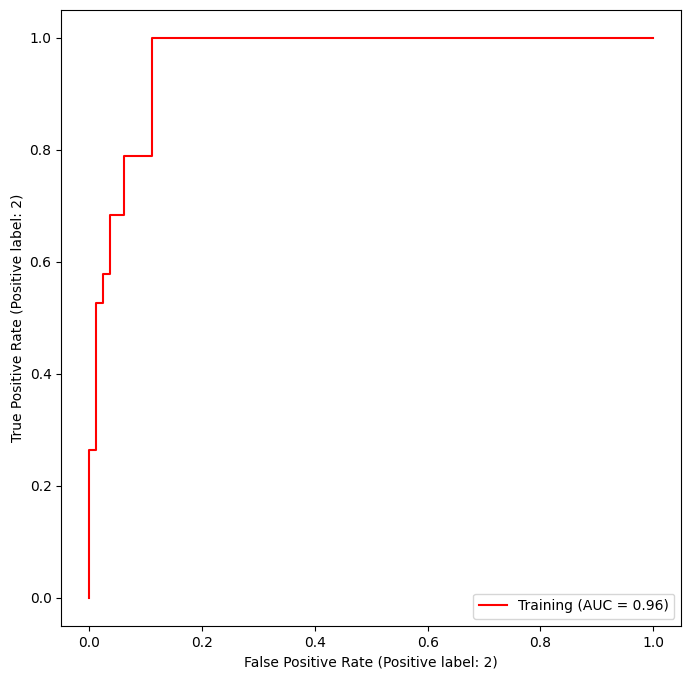

In [65]:
# SVMs and support vector classifiers output class labels for each observation. However it is also
# possible to obtain fitted values for each observation, which aret the numerical scores used to 
# obtain the class labels. For instance, in the case of a support vector classifier, the fitted value

# For an SVM with a nonlinear kernel, the equation that yields the fitted value is given in . The sign
# of the fitted value determines on which side of the decision boundary the observation lies. Therefore


fig, ax = plt.subplots(figsize= (8,8))
roc_curve(best_svm,X_train,y_train,name='Training',color='r',ax=ax)

In [66]:
# By increasing gamma we can produce a more flexible fit and generate further improvements in 
# accuracy


svm_flex = SVC(kernel='rbf', gamma=50, C=1)

In [67]:
svm_flex.fit(X_train, y_train)

SVC(C=1, gamma=50)

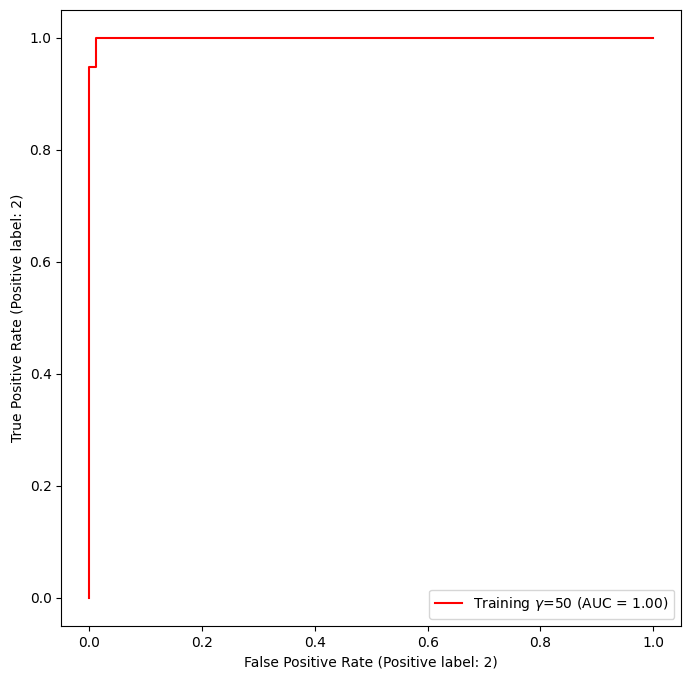

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma$=50',
          color='r',
          ax=ax)

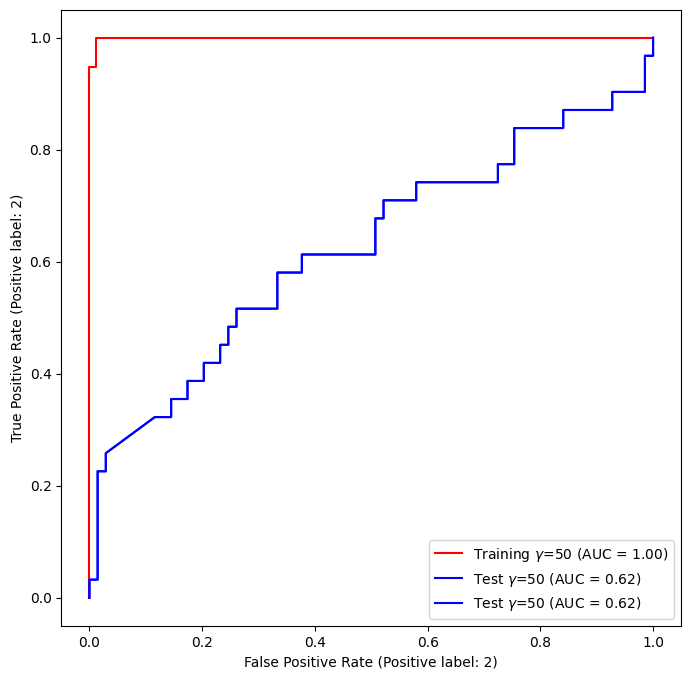

In [71]:
# The above is on training data
# However if we check the ROC curve on the test data

roc_curve(svm_flex,
          X_test,
          y_test,
          name='Test $\gamma$=50',
          color='b',
          ax=ax)
fig

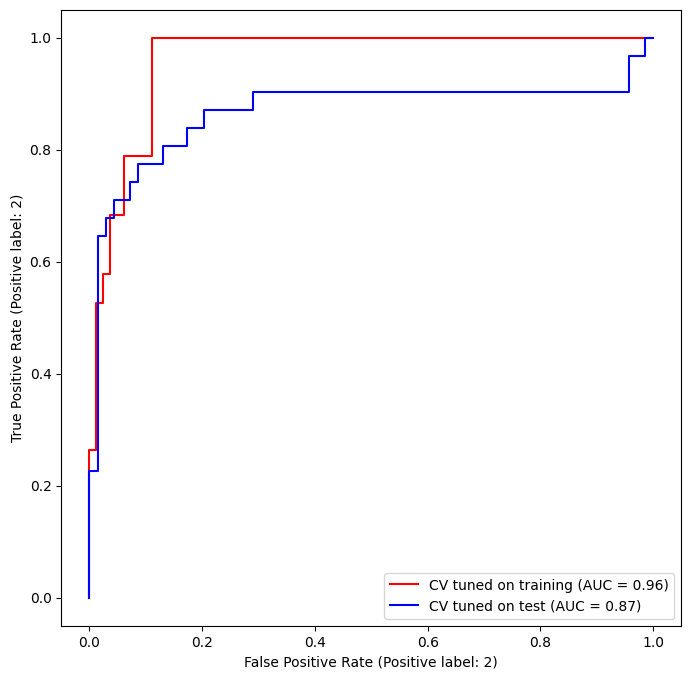

In [72]:
fig, ax = plt.subplots(figsize=(8,8))
for (X_, y_, c, name) in zip((X_train,X_test), (y_train, y_test), ('r', 'b'), ('CV tuned on training', 'CV tuned on test')):
    roc_curve(best_svm, X_,y_, name=name,ax=ax, color=c)

## SVM with Multiple Classes

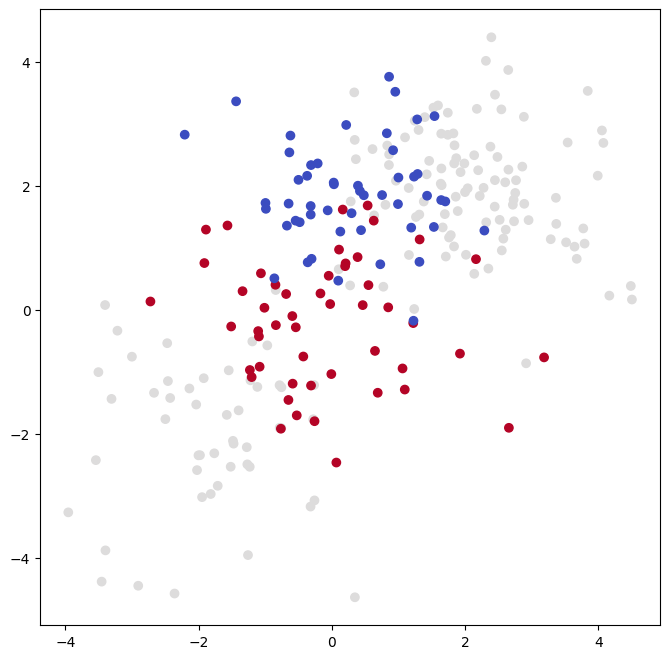

In [73]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50,2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)


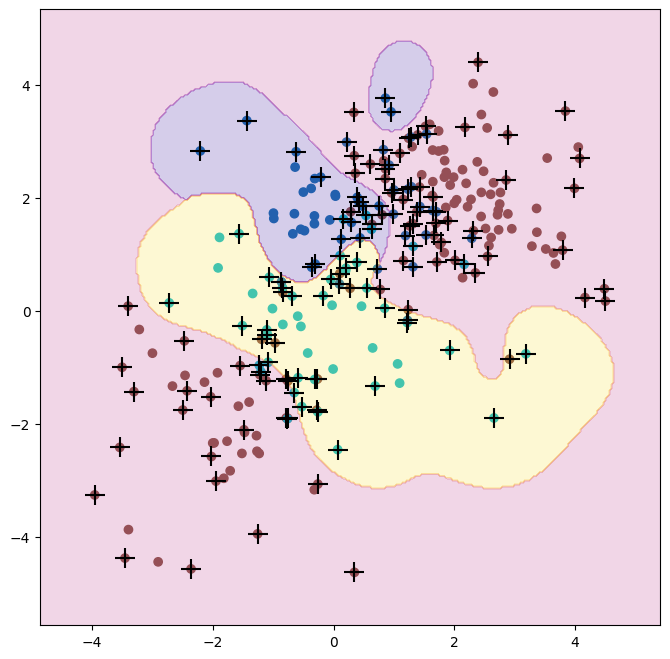

In [78]:
svm_rbf_3 = SVC(kernel='rbf',C=10,gamma=1, decision_function_shape='ovo')
svm_rbf_3.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X, y, svm_rbf_3, scatter_cmap=plt.cm.tab10,ax=ax)

## Application to Gene Expression Data

In [79]:
# We now examine the Khan data set, which consists of a number of tissue,
# samples corresponding to four distinct types of small round blue cell tumors.
# For each tissue sample, gene expression measurements are available.
# The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest

Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [80]:
khan_linear = SVC(kernel='linear',C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']), Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [81]:
#checking the performance on the test set


confusion_table(khan_linear.predict(Khan['xtest']), Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


In [82]:
# We see that C=10 yields two test set errors on these data.